In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler 
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline  


In [ ]:
X = 6 * np.random.rand(200,1) - 3  
# np.random.rand(200,1) → 200 random numbers between 0 and 1
# 6 * ... → unhe 0 se 6 range mein convert karta hai
# -3 → phir range ko -3 se +3 shift kar deta hai
# So final X values lie between -3 and +3
# Ye tum input feature bana rahi ho.
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.rand(200,1) #underline eq

# 0.8 * X**2 → quadratic term
# + X → linear term
# + 2 → constant
# + np.random.rand(200,1) → thoda random noise add karta hai
# Ye ek quadratic curve ke around thoda noisy data generate karta hai.
# So final y ek curve ko follow karta hai:

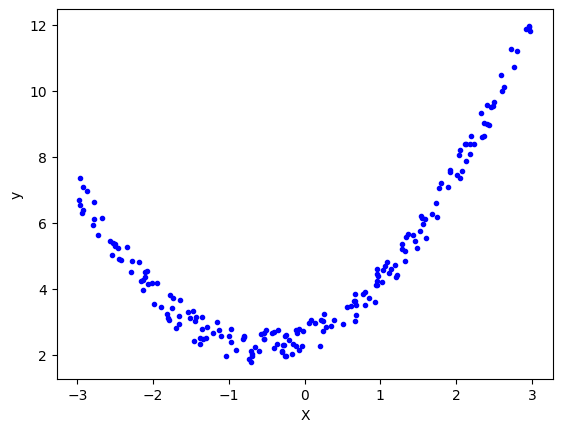

In [7]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

old 0.3206035421340554


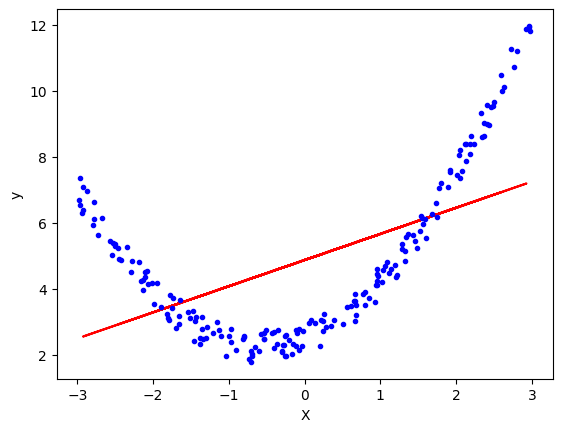

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)
lr = LinearRegression()
lr.fit(X_train , y_train)
LinearRegression()
y_pred = lr.predict(X_test)
print("old" ,r2_score(y_test , y_pred))

plt.plot(X_test , lr.predict(X_test) , color = 'red')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y                                                                                     ')
plt.show()

In [22]:
poly = PolynomialFeatures(degree = 2 , include_bias = True) # degree mei 1 input se 3 column bnenge
# include_bias intercept term include nhi krega 
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

print(X_train[0])
print(X_train_trans[0])


[0.66626043]
[1.         0.66626043 0.44390296]


In [23]:
lrp = LinearRegression()
lrp.fit(X_train_trans ,y_train)
y_pred_poly = lrp.predict(X_test_trans)
# print("NEW" ,r2_score(y_test , y_pred_poly))
print(lrp.coef_)
print(lrp.intercept_)

[[0.         0.89821734 0.78205708]]
[2.57658509]


In [24]:
X_new = np.linspace(-3, 3 , 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lrp.predict(X_new_poly)

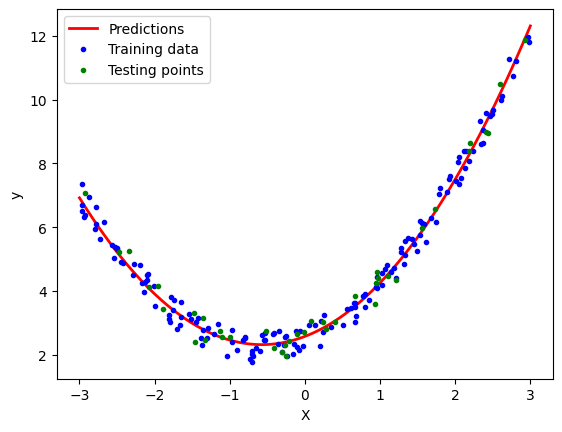

In [25]:
plt.plot(X_new , y_new , "r-" , linewidth = 2 , label = "Predictions")
plt.plot(X_train , y_train , "b." , label = "Training data")
plt.plot(X_test , y_test , "g.",label = 'Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
def polynomial_regression(degree):
    X_new = np.linspace(-3,3,100).reshape(100,1)

    polybig_features = PolynomialFeatures(degree = degree , include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression= Pipeline([
        ("poly_features " , polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg",lin_reg),
    ])

    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new , y_newbig , 'r' , label = 'Degree' + str(degree) , linewidth = 2)

    plt.plot(X_train , y_train , "b." , linewidth = 3)
    plt.plot(X_test , y_test , 'g.' , linewidth = 3)
    plt.legend(loc = "upper left")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-3,3,0,10])
    plt.show()

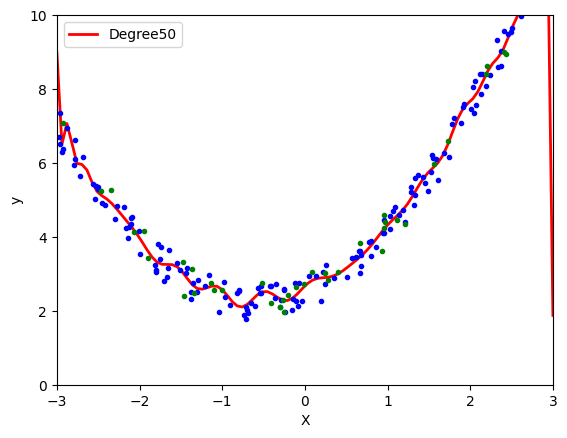

In [29]:
polynomial_regression(50)

**INTUTION**
Har extra degree ek extra feature deta hai,
har extra feature model ko data ke upar zyada control deta hai,
aur zyada control ka matlab hota hai overfitting ka risk.
**CONCLUSION**
Polynomial regression me degree badhane se features badhte hain, jisse model zyada flexible ho jata hai. Isliye degree itni hi rakhni chahiye ki curve overall trend follow kare, na ki har data point ko copy kare.

Degree batati hai model kitna curve bana sakta hai.
Degree ↔ Features relation 
Degree = d ⇒ total features = d + 1 (jab include_bias=True)
Examples:
Degree 1 → [1, x] → 2 features
Degree 2 → [1, x, x²] → 3 features

In [30]:
x = 7 *np.random.rand(100 , 1)-2.8
y = 7* np.random.rand(100 , 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)


In [38]:
import plotly.express as px   
df = px.data.iris()
fig = px.scatter_3d(df , x=x.ravel() , y = y.ravel() , z = z.ravel())
fig.show()

In [39]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2) , z)
x_input = np.linspace(x.min() , x.max() , 10)
y_input = np.linspace(y.min() , y.max() , 10)

xGrid ,yGrid = np.meshgrid(x_input , y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)


In [33]:
import plotly.graph_objects as go  
fig = px.scatter_3d(df , x = x.ravel() , y = y.ravel() , z = z.ravel())
fig.add_trace(go.Surface(x = x_input , y=y_input , z = z_final))
fig.show()

In [40]:
X_multi = np.column_stack((X, y))
X_multi.shape
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 200 and the array at index 1 has size 100